# 先将games.json转换成csv文件

因为games.csv中的appid并不能和其他的csv中的appid对应，所以我们将原本的json文件转成一个新的csv

In [7]:
ls

project.ipynb


In [10]:
import json
import pandas as pd

json_path = "../data/Steam Games Dataset/games.json"
with open(json_path, "r", encoding="utf-8") as f:
    data = json.load(f)

games_clean = pd.DataFrame.from_dict(data, orient="index")
games_clean.index.name = "appid"
games_clean.reset_index(inplace=True)

rename_map = {
    "name": "Name",
    "release_date": "Release date",
    "required_age": "Required age",
    "price": "Price",
    "dlc_count": "DiscountDLC count",
    "detailed_description": "Detailed description",
    "supported_languages": "Supported languages",
    "full_audio_languages": "Full audio languages",
    "reviews": "Reviews",
    "header_image": "Header image",
    "website": "Website",
    "support_url": "Support url",
    "support_email": "Support email",
    "windows": "Windows",
    "mac": "Mac",
    "linux": "Linux",
    "metacritic_score": "Metacritic score",
    "metacritic_url": "Metacritic url",
    "achievements": "Achievements",
    "recommendations": "Recommendations",
    "notes": "Notes",
    "developers": "Developers",
    "publishers": "Publishers",
    "categories": "Categories",
    "genres": "Genres",
    "screenshots": "Screenshots",
    "movies": "Movies",
    "user_score": "User score",
    "score_rank": "Score rank",
    "positive": "Positive",
    "negative": "Negative",
    "estimated_owners": "Estimated owners",
    "average_playtime_forever": "Average playtime forever",
    "average_playtime_2weeks": "Average playtime two weeks",
    "median_playtime_forever": "Median playtime forever",
    "median_playtime_2weeks": "Median playtime two weeks",
    "peak_ccu": "Peak CCU",
    "about_the_game": "About the game",
    "tags": "Tags"
}
games_clean.rename(columns=rename_map, inplace=True)

games_clean["appid"] = pd.to_numeric(games_clean["appid"], errors="coerce").astype("Int64")
games_clean["Price"] = pd.to_numeric(games_clean["Price"], errors="coerce")
games_clean["Required age"] = pd.to_numeric(games_clean["Required age"], errors="coerce").astype("Int64")
games_clean["Release date"] = pd.to_datetime(games_clean["Release date"], errors="coerce")

games_clean.head(3)
games_clean.dtypes

output_path = "../data/Steam Games Dataset/games_clean.csv"

games_clean.to_csv(output_path, index=False, encoding="utf-8")

print(f"Successfully exported as: {output_path}")

Successfully exported as: ../data/Steam Games Dataset/games_clean.csv


# explore the value of the games_clean.csv

In [ ]:
import pandas as pd

# Load cleaned Steam games data
games_clean = pd.read_csv("Steam Games Dataset/games_clean.csv")

print(games_clean.info())

games_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111452 entries, 0 to 111451
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   appid                       111452 non-null  int64  
 1   Name                        111446 non-null  object 
 2   Release date                111321 non-null  object 
 3   Required age                111452 non-null  int64  
 4   Price                       111452 non-null  float64
 5   DiscountDLC count           111452 non-null  int64  
 6   Detailed description        104995 non-null  object 
 7   About the game              104969 non-null  object 
 8   short_description           105076 non-null  object 
 9   Reviews                     10624 non-null   object 
 10  Header image                111452 non-null  object 
 11  Website                     46458 non-null   object 
 12  Support url                 50759 non-null   object 
 13  Support email 

,appid,Name,Release date,Required age,Price,DiscountDLC count,Detailed description,About the game,short_description,Reviews,...,Positive,Negative,Estimated owners,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Peak CCU,Tags,discount
0,20200,Galactic Bowling,2008-10-21,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,NaN,...,6,11,0 - 20000,0,0,0,0,0,"{'Indie': 22, 'Casual': 21, 'Sports': 21, 'Bow...",NaN
1,655370,Train Bandit,2017-10-12,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,NaN,...,53,5,0 - 20000,0,0,0,0,0,"{'Indie': 109, 'Action': 103, 'Pixel Graphics'...",NaN
2,1732930,Jolt Project,2021-11-17,0,4.99,0,Jolt Project: The army now has a new robotics ...,Jolt Project: The army now has a new robotics ...,"Shoot vehicles, blow enemies with a special at...",NaN,...,0,0,0 - 20000,0,0,0,0,0,[],NaN
3,1355720,Henosis™,2020-07-23,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,NaN,...,3,0,0 - 20000,0,0,0,0,0,"{'2D Platformer': 161, 'Atmospheric': 154, 'Su...",NaN
4,1139950,Two Weeks in Painland,2020-02-03,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,ABOUT THE GAME Play as a hacker who has arrang...,Two Weeks in Painland is a story-driven game a...,NaN,...,50,8,0 - 20000,0,0,0,0,0,"{'Indie': 42, 'Adventure': 41, 'Nudity': 22, '...",NaN


# 删除不需要的字段

In [ ]:
# List of columns to drop
drop_columns = [
    # Large textual columns
    "Detailed description",
    "About the game",
    "short_description",
    "Notes",
    "Reviews",

    # URL / link related columns
    "Header image",
    "Website",
    "Support url",
    "Support email",
    "Metacritic url",

    # Extremely sparse column
    "Score rank",

    # Low-value fields you decided to remove:
    "Supported languages",
    "Full audio languages",
    "packages",
    "Developers",
    "Publishers",
    
    # Media fields
    "Screenshots",
    "Movies"
]

# Drop the columns
games_clean = games_clean.drop(columns=drop_columns, errors='ignore')

# Display new shape and columns for verification
print("Remaining columns:", games_clean.columns.tolist())
print("New shape:", games_clean.shape)

Remaining columns: ['appid', 'Name', 'Release date', 'Required age', 'Price', 'DiscountDLC count', 'Windows', 'Mac', 'Linux', 'Metacritic score', 'Achievements', 'Recommendations', 'Categories', 'Genres', 'User score', 'Positive', 'Negative', 'Estimated owners', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks', 'Peak CCU', 'Tags', 'discount']
New shape: (111452, 25)


In [ ]:
games_clean = games_clean.drop(columns=["discount"])

In [ ]:
print(games_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111452 entries, 0 to 111451
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   appid                       111452 non-null  int64  
 1   Name                        111446 non-null  object 
 2   Release date                111321 non-null  object 
 3   Required age                111452 non-null  int64  
 4   Price                       111452 non-null  float64
 5   DiscountDLC count           111452 non-null  int64  
 6   Windows                     111452 non-null  bool   
 7   Mac                         111452 non-null  bool   
 8   Linux                       111452 non-null  bool   
 9   Metacritic score            111452 non-null  int64  
 10  Achievements                111452 non-null  int64  
 11  Recommendations             111452 non-null  int64  
 12  Categories                  111452 non-null  object 
 13  Genres        

# 看看release date的格式

In [ ]:
games_clean["Release date"].value_counts().head(20)

Release date
2024-10-24    151
2024-10-25    144
2024-10-31    143
2024-08-01    139
2024-12-05    133
2024-12-13    131
2025-03-07    126
2024-10-23    123
2025-03-28    123
2024-11-15    122
2025-03-06    120
2025-03-03    118
2024-10-22    115
2024-03-28    113
2024-11-14    112
2024-12-12    112
2024-07-12    112
2025-03-27    111
2024-11-07    109
2024-08-30    109
Name: count, dtype: int64

In [ ]:
games_clean["Release date"] = pd.to_datetime(games_clean["Release date"], errors="coerce")

# 增加一个release_year为后续EDA准备

In [ ]:
games_clean["release_year"] = games_clean["Release date"].dt.year

In [ ]:
print(games_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111452 entries, 0 to 111451
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   appid                       111452 non-null  int64         
 1   Name                        111446 non-null  object        
 2   Release date                111321 non-null  datetime64[ns]
 3   Required age                111452 non-null  int64         
 4   Price                       111452 non-null  float64       
 5   DiscountDLC count           111452 non-null  int64         
 6   Windows                     111452 non-null  bool          
 7   Mac                         111452 non-null  bool          
 8   Linux                       111452 non-null  bool          
 9   Metacritic score            111452 non-null  int64         
 10  Achievements                111452 non-null  int64         
 11  Recommendations             111452 non-

In [ ]:
games_clean.nlargest(10, "Positive")[["Name", "Positive", "Negative"]]

,Name,Positive,Negative
46158,Counter-Strike: Global Offensive,5764420,766677
17585,Dota 2,1477153,300437
57205,Grand Theft Auto V,1171197,210154
8885,PUBG: BATTLEGROUNDS,1154655,895978
46416,Terraria,964983,21044
8256,Tom Clancy's Rainbow Six® Siege,929372,138530
30583,Team Fortress 2,823693,56683
1289,Garry's Mod,822326,29004
35001,Rust,703687,108223
96948,Black Myth: Wukong,663109,28700


# 添加一个好评率和review总数

自己添加的，因为好评数可能因为人多

In [ ]:
games_clean["positive_rate"] = games_clean["Positive"] / (games_clean["Positive"] + games_clean["Negative"])

In [ ]:
games_clean["review_count"] = games_clean["Positive"] + games_clean["Negative"]

In [ ]:
games_clean = games_clean.drop(columns=["Positive", "Negative"], errors='ignore')

In [ ]:
games_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111452 entries, 0 to 111451
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   appid                       111452 non-null  int64         
 1   Name                        111446 non-null  object        
 2   Release date                111321 non-null  datetime64[ns]
 3   Required age                111452 non-null  int64         
 4   Price                       111452 non-null  float64       
 5   DiscountDLC count           111452 non-null  int64         
 6   Windows                     111452 non-null  bool          
 7   Mac                         111452 non-null  bool          
 8   Linux                       111452 non-null  bool          
 9   Metacritic score            111452 non-null  int64         
 10  Achievements                111452 non-null  int64         
 11  Recommendations             111452 non-

# 看看steam_app_data.csv


In [ ]:
import pandas as pd

steam_app = pd.read_csv("Steam-All games data/steam_app_data.csv", encoding="utf-8")
steam_app.head()
steam_app.info()

/var/folders/y7/v0nx8zrx04s74s7t7hm6z2fm0000gn/T/ipykernel_85466/3842638311.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  steam_app = pd.read_csv("Steam-All games data/steam_app_data.csv", encoding="utf-8")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86538 entries, 0 to 86537
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   type                     86324 non-null  object 
 1   name                     86521 non-null  object 
 2   steam_appid              86538 non-null  int64  
 3   required_age             86324 non-null  float64
 4   is_free                  86324 non-null  object 
 5   controller_support       20587 non-null  object 
 6   dlc                      14056 non-null  object 
 7   detailed_description     86250 non-null  object 
 8   about_the_game           86248 non-null  object 
 9   short_description        86226 non-null  object 
 10  fullgame                 4 non-null      object 
 11  supported_languages      86203 non-null  object 
 12  header_image             86315 non-null  object 
 13  website                  42176 non-null  object 
 14  pc_requirements       

# 先处理steam_game_data.csv

In [ ]:
drop_cols = [
    # 长文本 & HTML 字段
    "detailed_description", "about_the_game", "short_description",
    "header_image", "website", "pc_requirements", "mac_requirements",
    "linux_requirements", "legal_notice", "drm_notice",
    "ext_user_account_notice", "screenshots", "movies",
    "background", "support_info",

    # 极度缺失字段
    "fullgame", "demos", "metacritic", "reviews", "dlc", "recommendations",

    # 结构过于复杂且会重复处理
    "supported_languages", "price_overview", "packages",
    "package_groups", "platforms", "content_descriptors",
    "developers", "publishers",

    # 与 games_clean.csv 重复
    "categories", "genres", "achievements"
]

In [ ]:
steam_app_cleaned = steam_app.drop(columns=drop_cols, errors="ignore")

# steam_game_data删除一些不需要字段后的->steam_app_cleaned

In [ ]:
steam_app_cleaned.head()
steam_app_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86538 entries, 0 to 86537
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   type                86324 non-null  object 
 1   name                86521 non-null  object 
 2   steam_appid         86538 non-null  int64  
 3   required_age        86324 non-null  float64
 4   is_free             86324 non-null  object 
 5   controller_support  20587 non-null  object 
 6   release_date        86324 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 4.6+ MB


# type是啥

In [ ]:
steam_app_cleaned["type"].value_counts()

type
game    86320
demo        4
Name: count, dtype: int64

In [ ]:
steam_app_cleaned = steam_app_cleaned.drop(columns=["type"])

In [ ]:
steam_app_cleaned.head()
steam_app_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86538 entries, 0 to 86537
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                86521 non-null  object 
 1   steam_appid         86538 non-null  int64  
 2   required_age        86324 non-null  float64
 3   is_free             86324 non-null  object 
 4   controller_support  20587 non-null  object 
 5   release_date        86324 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.0+ MB


In [ ]:
steam_app_cleaned = steam_app_cleaned.drop(columns=["controller_support"])

In [ ]:
steam_app_cleaned.head()
steam_app_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86538 entries, 0 to 86537
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          86521 non-null  object 
 1   steam_appid   86538 non-null  int64  
 2   required_age  86324 non-null  float64
 3   is_free       86324 non-null  object 
 4   release_date  86324 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 3.3+ MB


# 看看all_data.csv

In [ ]:
import pandas as pd

all_data = pd.read_csv("Steam-All games data/all_data.csv", encoding="utf-8")

print(all_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86538 entries, 0 to 86537
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       86538 non-null  int64  
 1   appid            86538 non-null  int64  
 2   name             86520 non-null  object 
 3   developer        86227 non-null  object 
 4   publisher        85924 non-null  object 
 5   score_rank       47 non-null     float64
 6   positive         86538 non-null  int64  
 7   negative         86538 non-null  int64  
 8   userscore        86538 non-null  int64  
 9   owners           86538 non-null  object 
 10  average_forever  86538 non-null  int64  
 11  average_2weeks   86538 non-null  int64  
 12  median_forever   86538 non-null  int64  
 13  median_2weeks    86538 non-null  int64  
 14  price            86510 non-null  float64
 15  initialprice     86517 non-null  float64
 16  discount         86517 non-null  float64
 17  ccu         

# delete some unused value

In [ ]:
import pandas as pd

df = pd.read_csv("Steam-All games data/all_data.csv", encoding="utf-8")

drop_columns = [
    "Unnamed: 0",      # 无意义
    "developer",       # 文本字段，后续不用
    "publisher",       # 文本字段，后续不用
    "score_rank",      # 只有47个有效值，几乎全 NaN
    "median_forever",  # 与 average_forever 冗余
    "median_2weeks",   # 与 average_2weeks 冗余
    "initialprice",    # 与 price/discount 冗余
]

df_clean = df.drop(columns=drop_columns, errors="ignore")

print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86538 entries, 0 to 86537
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            86538 non-null  int64  
 1   name             86520 non-null  object 
 2   positive         86538 non-null  int64  
 3   negative         86538 non-null  int64  
 4   userscore        86538 non-null  int64  
 5   owners           86538 non-null  object 
 6   average_forever  86538 non-null  int64  
 7   average_2weeks   86538 non-null  int64  
 8   price            86510 non-null  float64
 9   discount         86517 non-null  float64
 10  ccu              86538 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 7.3+ MB
None


In [ ]:
df_clean["owners"].value_counts().head(20)

owners
0 .. 20,000                   59568
20,000 .. 50,000              11940
50,000 .. 100,000              5654
100,000 .. 200,000             3658
200,000 .. 500,000             3021
500,000 .. 1,000,000           1247
1,000,000 .. 2,000,000          787
2,000,000 .. 5,000,000          432
5,000,000 .. 10,000,000         134
10,000,000 .. 20,000,000         53
20,000,000 .. 50,000,000         32
50,000,000 .. 100,000,000         9
100,000,000 .. 200,000,000        3
Name: count, dtype: int64

In [ ]:
df_clean["ccu"].value_counts().head(20)

ccu
0     67309
1      6304
2      2445
3      1402
4       907
5       666
6       533
7       373
8       354
9       283
10      264
11      231
12      211
13      175
15      134
16      132
14      132
17      117
18      101
21       95
Name: count, dtype: int64

In [ ]:
games_clean["Estimated owners"].value_counts().head(20)

Estimated owners
0 - 20000                70206
0 - 0                    22091
20000 - 50000             8277
50000 - 100000            4068
100000 - 200000           2664
200000 - 500000           2206
500000 - 1000000           921
1000000 - 2000000          525
2000000 - 5000000          336
5000000 - 10000000          93
10000000 - 20000000         38
20000000 - 50000000         21
50000000 - 100000000         5
100000000 - 200000000        1
Name: count, dtype: int64

In [ ]:
games_clean["Peak CCU"].value_counts().head(20)

Peak CCU
0     82955
1      8841
2      3493
3      1964
4      1398
5      1023
6       754
7       610
8       484
9       396
10      379
11      320
12      275
13      253
14      231
16      216
15      206
17      177
19      168
18      144
Name: count, dtype: int64

# 合并

In [ ]:
merged_df = pd.merge(
    games_clean,
    df_clean,
    on="appid",
    how="inner"
)

In [ ]:
print(merged_df.shape)


(84125, 35)


# 合并后的数据分析

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84125 entries, 0 to 84124
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   appid                       84125 non-null  int64         
 1   Name                        84121 non-null  object        
 2   Release date                84007 non-null  datetime64[ns]
 3   Required age                84125 non-null  int64         
 4   Price                       84125 non-null  float64       
 5   DiscountDLC count           84125 non-null  int64         
 6   Windows                     84125 non-null  bool          
 7   Mac                         84125 non-null  bool          
 8   Linux                       84125 non-null  bool          
 9   Metacritic score            84125 non-null  int64         
 10  Achievements                84125 non-null  int64         
 11  Recommendations             84125 non-null  int64     

In [ ]:
cols_to_drop = [
    "name",               # 重复 Name
    "price",              # 重复 Price
    "Estimated owners",             # 重复 Estimated owners
    "average_forever",    # 重复 Average playtime forever
    "average_2weeks",     # 重复 Average playtime two weeks
    "positive",
    "negative",
    "Peak CCU",
]

if (merged_df["User score"] == merged_df["userscore"]).mean() > 0.999:
    cols_to_drop.append("userscore")
    print("userscore same as User score")

merged_df_cleaned = merged_df.drop(columns=cols_to_drop, errors="ignore")

print("删除后的列数：", merged_df_cleaned.shape[1])
print("剩余的列：", merged_df_cleaned.columns.tolist())

userscore same as User score
删除后的列数： 26
剩余的列： ['appid', 'Name', 'Release date', 'Required age', 'Price', 'DiscountDLC count', 'Windows', 'Mac', 'Linux', 'Metacritic score', 'Achievements', 'Recommendations', 'Categories', 'Genres', 'User score', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks', 'Tags', 'release_year', 'positive_rate', 'review_count', 'owners', 'discount', 'ccu']


In [ ]:
merged_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84125 entries, 0 to 84124
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   appid                       84125 non-null  int64         
 1   Name                        84121 non-null  object        
 2   Release date                84007 non-null  datetime64[ns]
 3   Required age                84125 non-null  int64         
 4   Price                       84125 non-null  float64       
 5   DiscountDLC count           84125 non-null  int64         
 6   Windows                     84125 non-null  bool          
 7   Mac                         84125 non-null  bool          
 8   Linux                       84125 non-null  bool          
 9   Metacritic score            84125 non-null  int64         
 10  Achievements                84125 non-null  int64         
 11  Recommendations             84125 non-null  int64     

# EDA


In [ ]:
print(merged_df_cleaned["owners"].dtype)


object


In [ ]:
merged_df_cleaned["owners"].nunique()

13

In [ ]:
for val in merged_df_cleaned["owners"].unique()[:20]:
    print(val)

0 .. 20,000
50,000 .. 100,000
20,000 .. 50,000
200,000 .. 500,000
100,000 .. 200,000
2,000,000 .. 5,000,000
5,000,000 .. 10,000,000
1,000,000 .. 2,000,000
500,000 .. 1,000,000
100,000,000 .. 200,000,000
20,000,000 .. 50,000,000
10,000,000 .. 20,000,000
50,000,000 .. 100,000,000


In [ ]:
def convert_owner_range(s):
    if s is None or not isinstance(s, str):
        return None
    
    parts = s.split(" .. ")
    if len(parts) != 2:
        return None
    
    try:
        low = int(parts[0].replace(",", ""))
        high = int(parts[1].replace(",", ""))
        return (low + high) / 2
    except:
        return None

merged_df_cleaned["owners_numeric"] = merged_df_cleaned["owners"].apply(convert_owner_range)

In [ ]:
merged_df_cleaned["owners_numeric"].value_counts().head(20)

owners_numeric
10000.0        57624
35000.0        11723
75000.0         5552
150000.0        3594
350000.0        2982
750000.0        1227
1500000.0        771
3500000.0        424
7500000.0        132
15000000.0        53
35000000.0        31
75000000.0         9
150000000.0        3
Name: count, dtype: int64

In [ ]:
merged_df_cleaned["owners_numeric"].describe()

count    8.412500e+04
mean     1.253075e+05
std      1.471867e+06
min      1.000000e+04
25%      1.000000e+04
50%      1.000000e+04
75%      3.500000e+04
max      1.500000e+08
Name: owners_numeric, dtype: float64

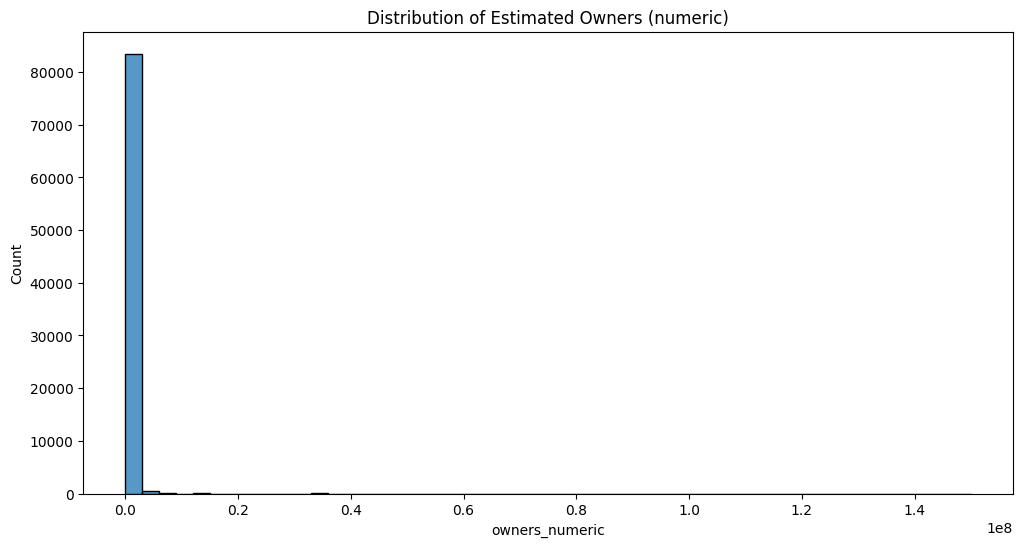

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.histplot(merged_df_cleaned["owners_numeric"], bins=50)
plt.title("Distribution of Estimated Owners (numeric)")
plt.show()

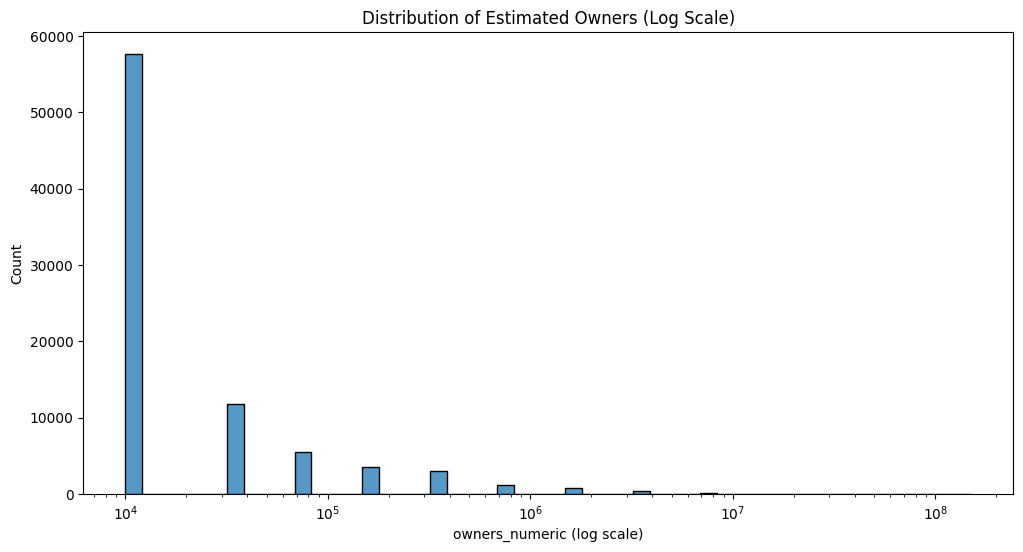

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(merged_df_cleaned["owners_numeric"], bins=50, log_scale=True)
plt.title("Distribution of Estimated Owners (Log Scale)")
plt.xlabel("owners_numeric (log scale)")
plt.show()

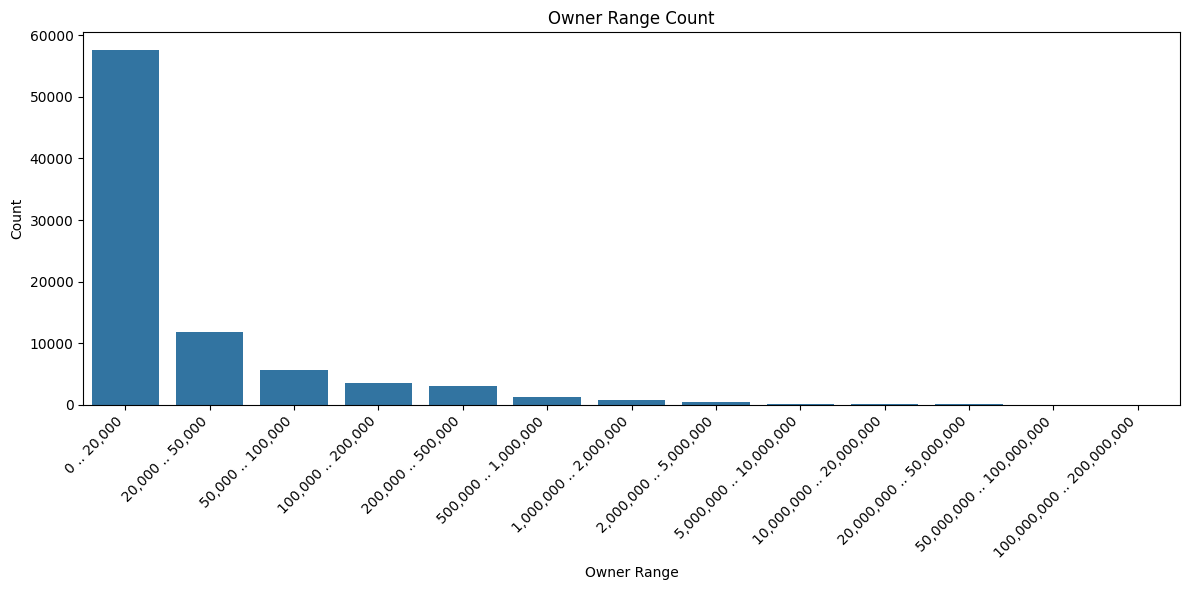

In [ ]:
# 计算 owners_bucket 的频数
owners_counts = merged_df_cleaned["owners_bucket"].value_counts()

# 转成 DataFrame 并排序
owners_counts = owners_counts.reset_index()
owners_counts.columns = ["owners_bucket", "count"]
owners_counts = owners_counts.sort_values("count", ascending=False)

# 绘图：纵向柱状图
plt.figure(figsize=(12,6))
sns.barplot(data=owners_counts, x="owners_bucket", y="count")

plt.xticks(rotation=45, ha="right")
plt.title("Owner Range Count")
plt.xlabel("Owner Range")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

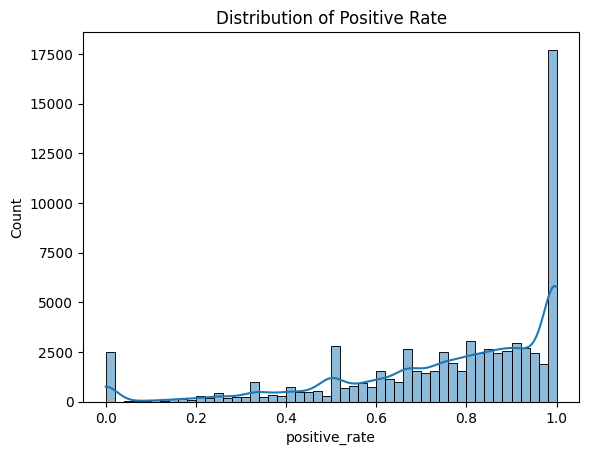

In [ ]:
sns.histplot(merged_df_cleaned["positive_rate"], bins=50, kde=True)
plt.title("Distribution of Positive Rate")
plt.show()

This plot shows the distribution of the positive rate across all Steam games in the dataset.


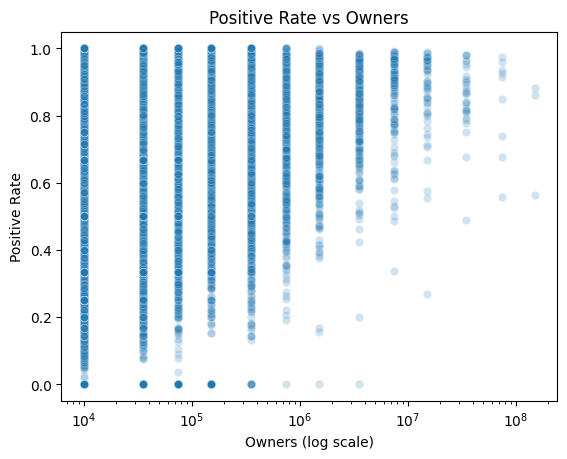

In [ ]:
sns.scatterplot(
    data=merged_df_cleaned,
    x="owners_numeric",
    y="positive_rate",
    alpha=0.2
)

plt.xscale("log")
plt.xlabel("Owners (log scale)")
plt.ylabel("Positive Rate")
plt.title("Positive Rate vs Owners")
plt.show()

This scatterplot shows the relationship between positive rate and estimated owners.

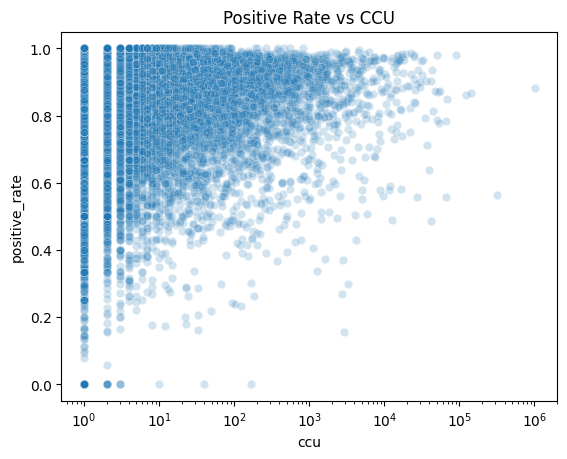

In [ ]:
sns.scatterplot(
    data=merged_df_cleaned,
    x="ccu",
    y="positive_rate",
    alpha=0.2
)

plt.xscale("log")
plt.title("Positive Rate vs CCU")
plt.show()

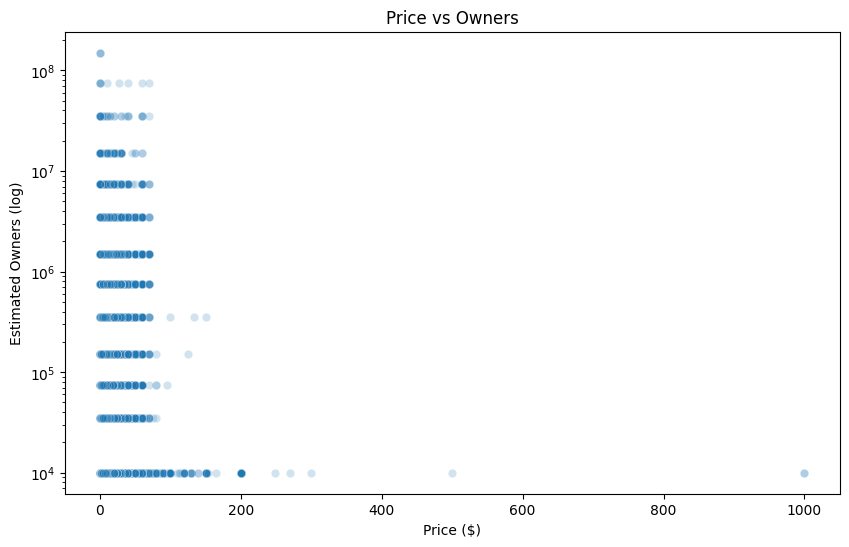

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=merged_df_cleaned,
    x="Price",
    y="owners_numeric",
    alpha=0.2
)
plt.yscale("log")
plt.xlabel("Price ($)")
plt.ylabel("Estimated Owners (log)")
plt.title("Price vs Owners")
plt.show()

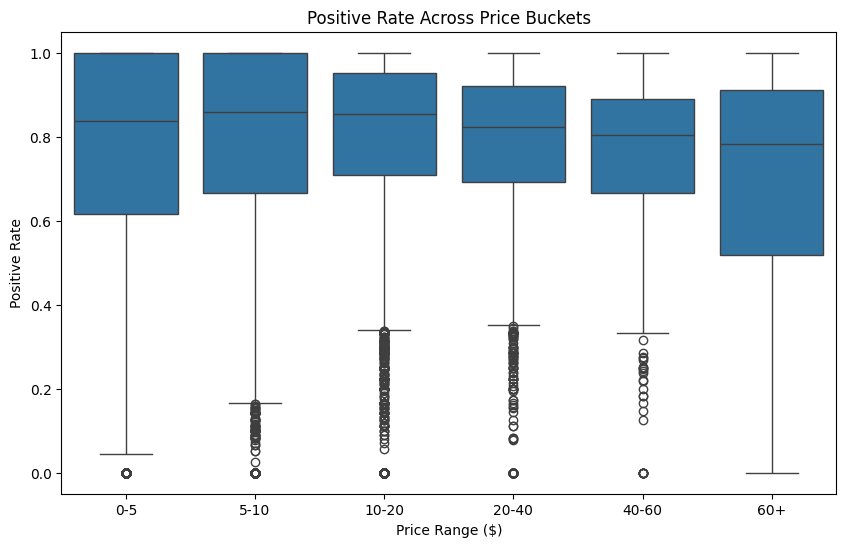

In [ ]:
merged_df_cleaned["price_bucket"] = pd.cut(
    merged_df_cleaned["Price"],
    bins=[0, 5, 10, 20, 40, 60, 200],
    labels=["0-5", "5-10", "10-20", "20-40", "40-60", "60+"]
)

plt.figure(figsize=(10,6))
sns.boxplot(
    data=merged_df_cleaned,
    x="price_bucket",
    y="positive_rate"
)
plt.title("Positive Rate Across Price Buckets")
plt.xlabel("Price Range ($)")
plt.ylabel("Positive Rate")
plt.show()

In [ ]:
merged_df_cleaned["Genres"].nunique()

2378

In [ ]:
for g in merged_df_cleaned["Genres"].unique()[:20]:
    print(g)

['Casual', 'Indie', 'Sports']
['Adventure', 'Casual', 'Indie']
['Adventure', 'Indie']
['Adventure', 'Casual', 'Free to Play', 'Massively Multiplayer', 'RPG', 'Strategy']
['Indie', 'Strategy']
['Casual']
['Adventure', 'RPG', 'Simulation', 'Strategy']
['Action', 'Adventure', 'Indie']
['Indie', 'RPG']
['Strategy']
['Casual', 'Indie']
['Action', 'Adventure', 'Indie', 'RPG', 'Strategy', 'Early Access']
['Action']
['Action', 'Casual', 'Simulation', 'Sports']
['Adventure', 'Casual', 'Indie', 'RPG']
['Action', 'Adventure', 'Casual', 'Indie', 'Early Access']
['Action', 'Adventure', 'Casual', 'Indie']
['Action', 'Indie', 'Racing', 'Simulation']
['Massively Multiplayer', 'Racing', 'Simulation', 'Sports']
['Action', 'Indie', 'Simulation']


In [ ]:
import ast

# 如果 Genres 是字符串，先转成 list
merged_df_cleaned["Genres"] = merged_df_cleaned["Genres"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

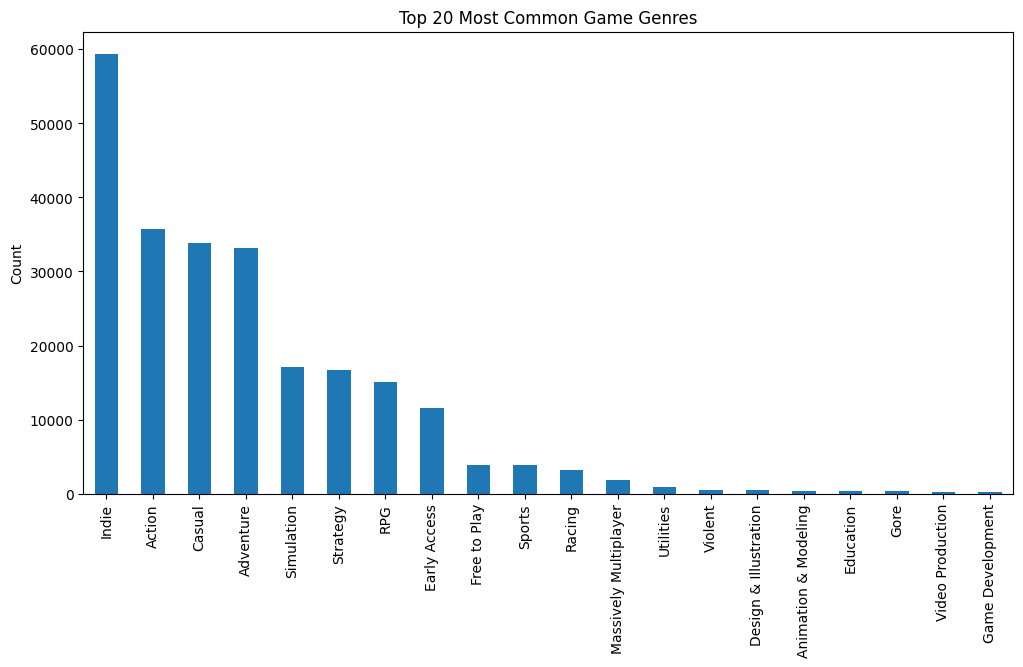

In [ ]:
from collections import Counter

genre_counts = Counter()

for genre_list in merged_df_cleaned["Genres"]:
    for g in genre_list:
        genre_counts[g] += 1

pd.Series(genre_counts).sort_values(ascending=False).head(20).plot(
    kind="bar", figsize=(12,6)
)
plt.title("Top 20 Most Common Game Genres")
plt.ylabel("Count")
plt.show()

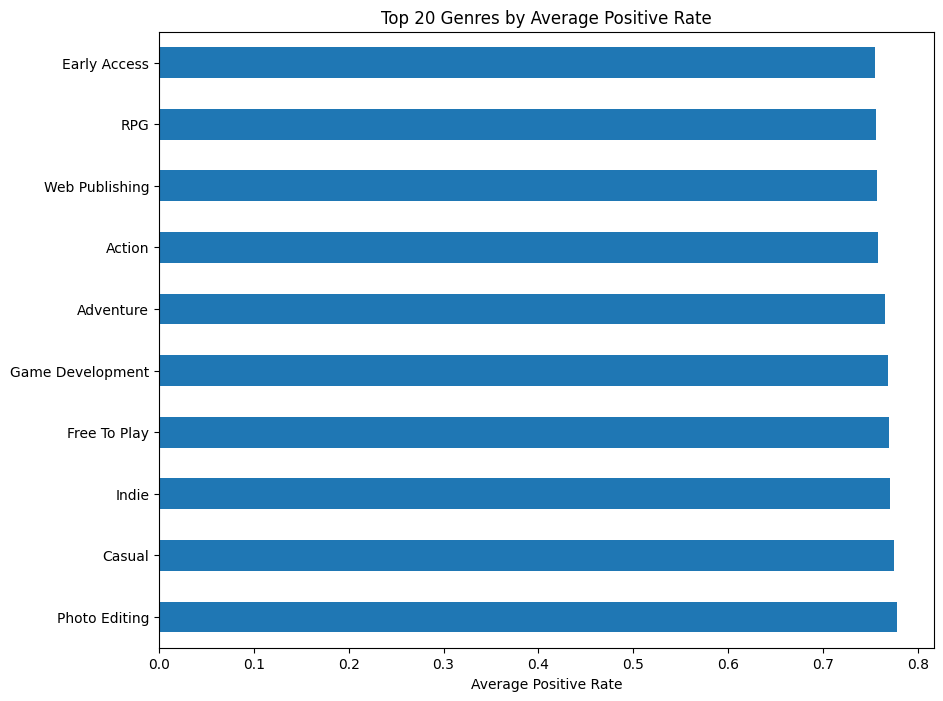

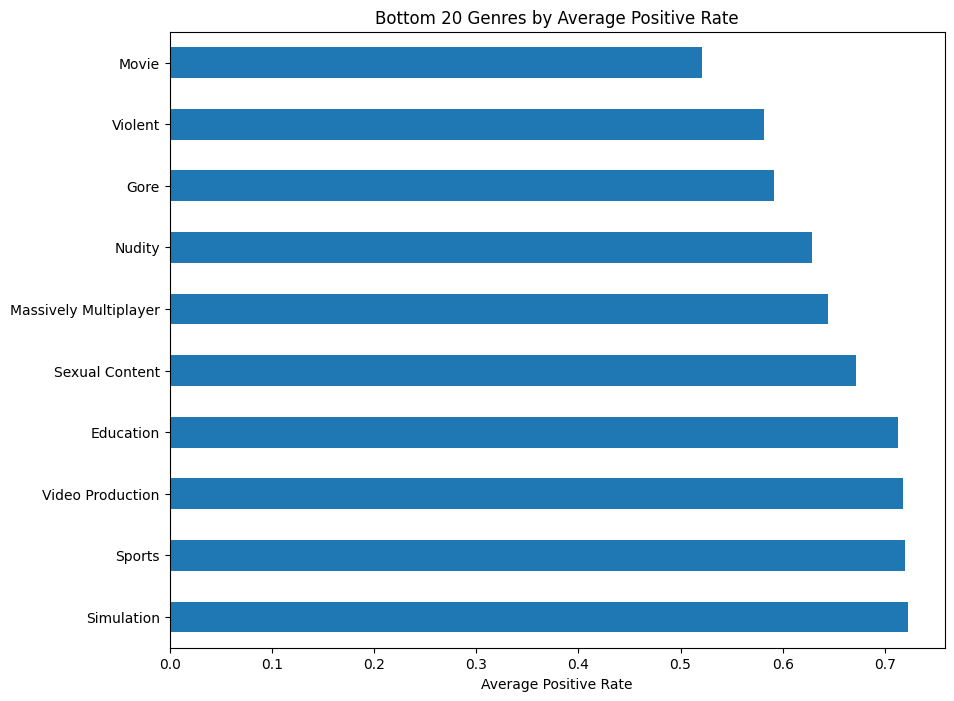

In [ ]:
genre_rate = {}

for genre_list, rate in zip(merged_df_cleaned["Genres"], merged_df_cleaned["positive_rate"]):
    # 没有 positive_rate 的先跳过
    if pd.isna(rate):
        continue
    
    # 保险：如果某些还不小心是字符串，就再转一下
    if isinstance(genre_list, str):
        # 比如是 "Action;Indie" 这种
        parts = [x.strip() for x in genre_list.split(";")]
    else:
        parts = genre_list  # 已经是 ['Action', 'Indie'] 这种 list

    for g in parts:
        g = g.strip()
        genre_rate.setdefault(g, []).append(rate)

# 计算每个类别的平均 positive_rate
genre_rate_mean = {k: sum(v) / len(v) for k, v in genre_rate.items()}

pd.Series(genre_rate_mean).sort_values(ascending=False).head(10).plot(
    kind="barh", figsize=(10, 8)
)
plt.title("Top 20 Genres by Average Positive Rate")
plt.xlabel("Average Positive Rate")
plt.show()

pd.Series(genre_rate_mean).sort_values(ascending=False).tail(10).plot(
    kind="barh", figsize=(10, 8)
)
plt.title("Bottom 20 Genres by Average Positive Rate")
plt.xlabel("Average Positive Rate")
plt.show()

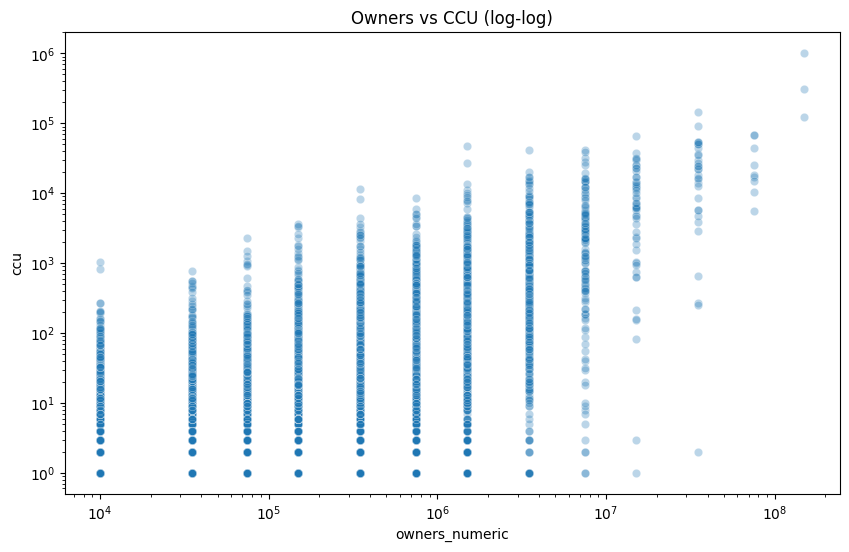

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=merged_df_cleaned,
    x="owners_numeric",
    y="ccu",
    alpha=0.3
)
plt.xscale("log")
plt.yscale("log")
plt.title("Owners vs CCU (log-log)")
plt.show()

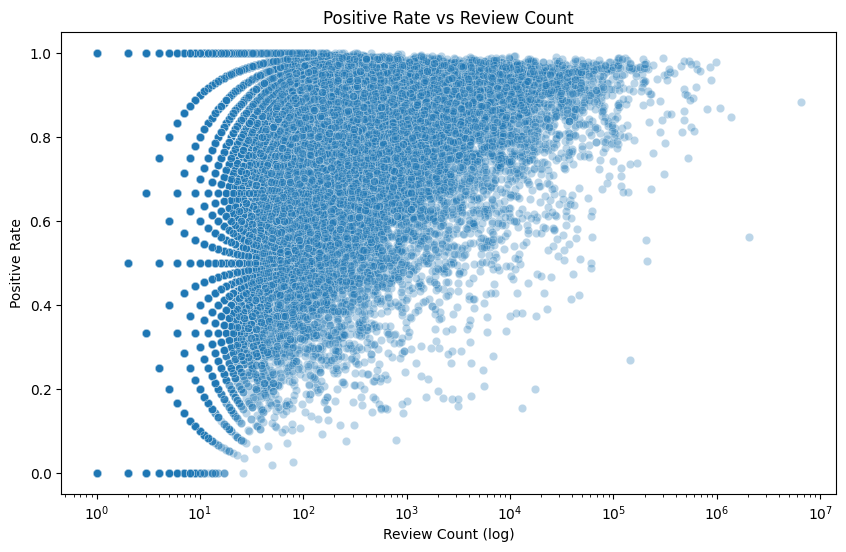

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=merged_df_cleaned,
    x="review_count",
    y="positive_rate",
    alpha=0.3
)
plt.xscale("log")
plt.xlabel("Review Count (log)")
plt.ylabel("Positive Rate")
plt.title("Positive Rate vs Review Count")
plt.show()

“This scatterplot shows the relationship between positive rate and review count.

Key findings:
	1.	Games with a high number of reviews tend to have more stable and higher positive rates (mostly between 0.8 and 1.0).
	2.	Games with few reviews show extreme volatility — their scores can be anywhere from 0% to 100%, meaning low-review ratings are unreliable.

# 什么是hit

In [ ]:
merged_df_cleaned["is_hit"] = (
    (merged_df_cleaned["owners_numeric"] > 200000) &
    (merged_df_cleaned["review_count"] > 1000) &
    (merged_df_cleaned["positive_rate"] > 0.8)
).astype(int)

In [ ]:
merged_df_cleaned["is_hit"].value_counts(normalize=True)

is_hit
0    0.96586
1    0.03414
Name: proportion, dtype: float64

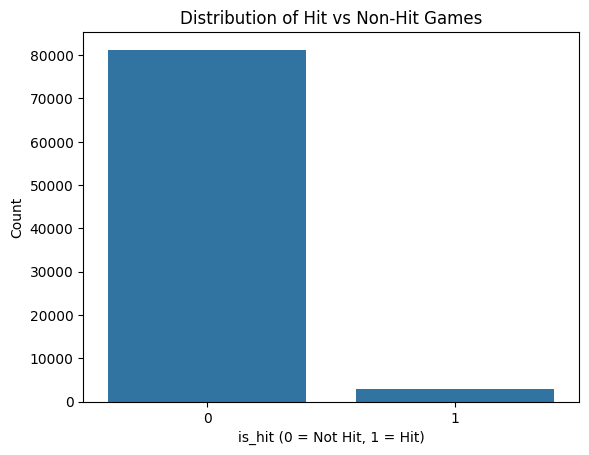

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="is_hit", data=merged_df_cleaned)
plt.title("Distribution of Hit vs Non-Hit Games")
plt.xlabel("is_hit (0 = Not Hit, 1 = Hit)")
plt.ylabel("Count")
plt.show()

“Using our definition of a hit — more than 200k estimated owners, more than 1,000 reviews, and a positive rate above 0.8 — only 3.4% of games are classified as hits.

This ratio is realistic because:
	•	Most Steam games have fewer than 20k owners.
	•	More than 1,000 reviews is already a very high threshold.
	•	A positive rate above 0.8 filters out moderate-quality games.


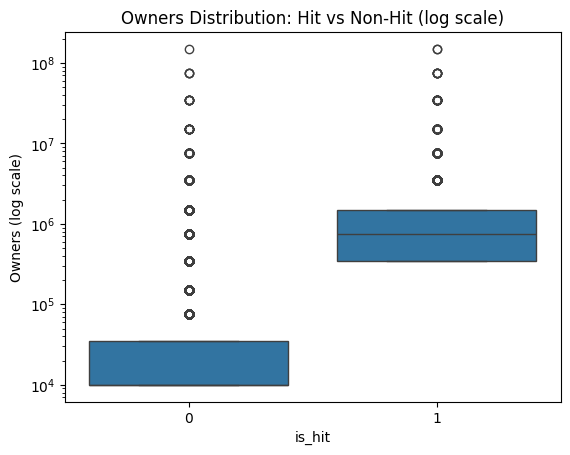

In [ ]:
sns.boxplot(
    x="is_hit",
    y="owners_numeric",
    data=merged_df_cleaned
)
plt.yscale("log")
plt.title("Owners Distribution: Hit vs Non-Hit (log scale)")
plt.xlabel("is_hit")
plt.ylabel("Owners (log scale)")
plt.show()

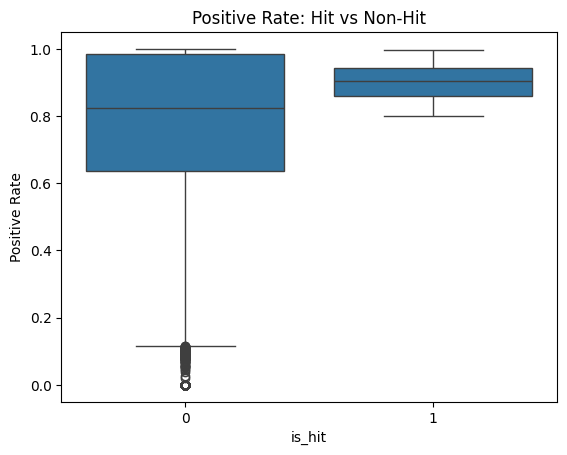

In [ ]:
sns.boxplot(
    x="is_hit",
    y="positive_rate",
    data=merged_df_cleaned
)
plt.title("Positive Rate: Hit vs Non-Hit")
plt.xlabel("is_hit")
plt.ylabel("Positive Rate")
plt.show()

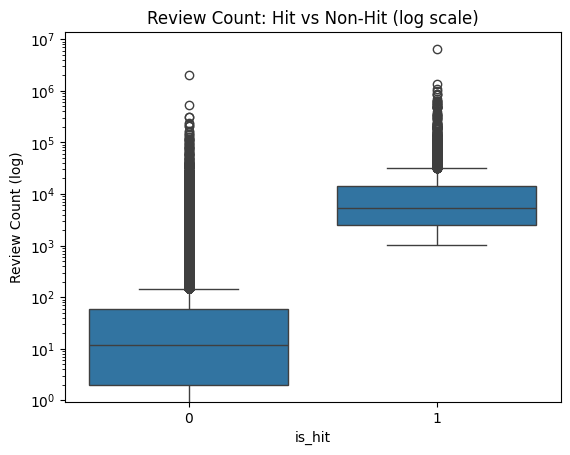

In [ ]:
sns.boxplot(
    x="is_hit",
    y="review_count",
    data=merged_df_cleaned
)
plt.yscale("log")
plt.title("Review Count: Hit vs Non-Hit (log scale)")
plt.xlabel("is_hit")
plt.ylabel("Review Count (log)")
plt.show()

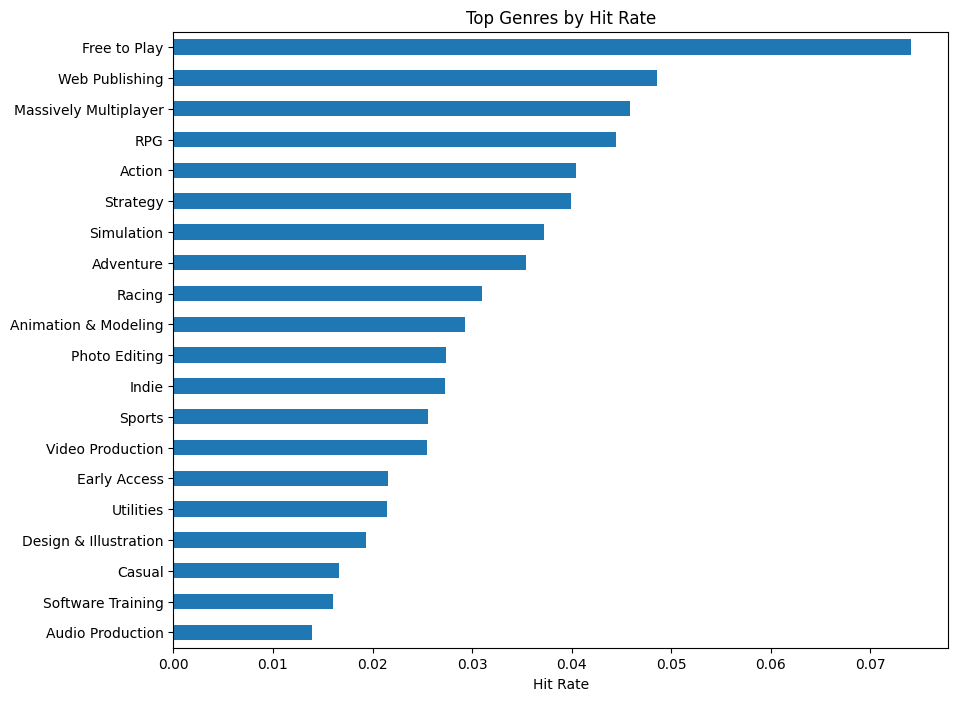

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

genre_hit = {}   
genre_count = {}   

for genres, hit in zip(merged_df_cleaned["Genres"], merged_df_cleaned["is_hit"]):

    if isinstance(genres, str):
        parts = [x.strip() for x in genres.split(";")]
    else:
        parts = genres

    for g in parts:
        genre_count[g] = genre_count.get(g, 0) + 1
        if hit == 1:
            genre_hit[g] = genre_hit.get(g, 0) + 1

genre_hit_rate = {g: genre_hit.get(g, 0) / genre_count[g] for g in genre_count}

genre_hit_rate_series = pd.Series(genre_hit_rate).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
genre_hit_rate_series.head(20).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top Genres by Hit Rate")
plt.xlabel("Hit Rate")
plt.show()

This chart shows the Hit Rate of each game genre

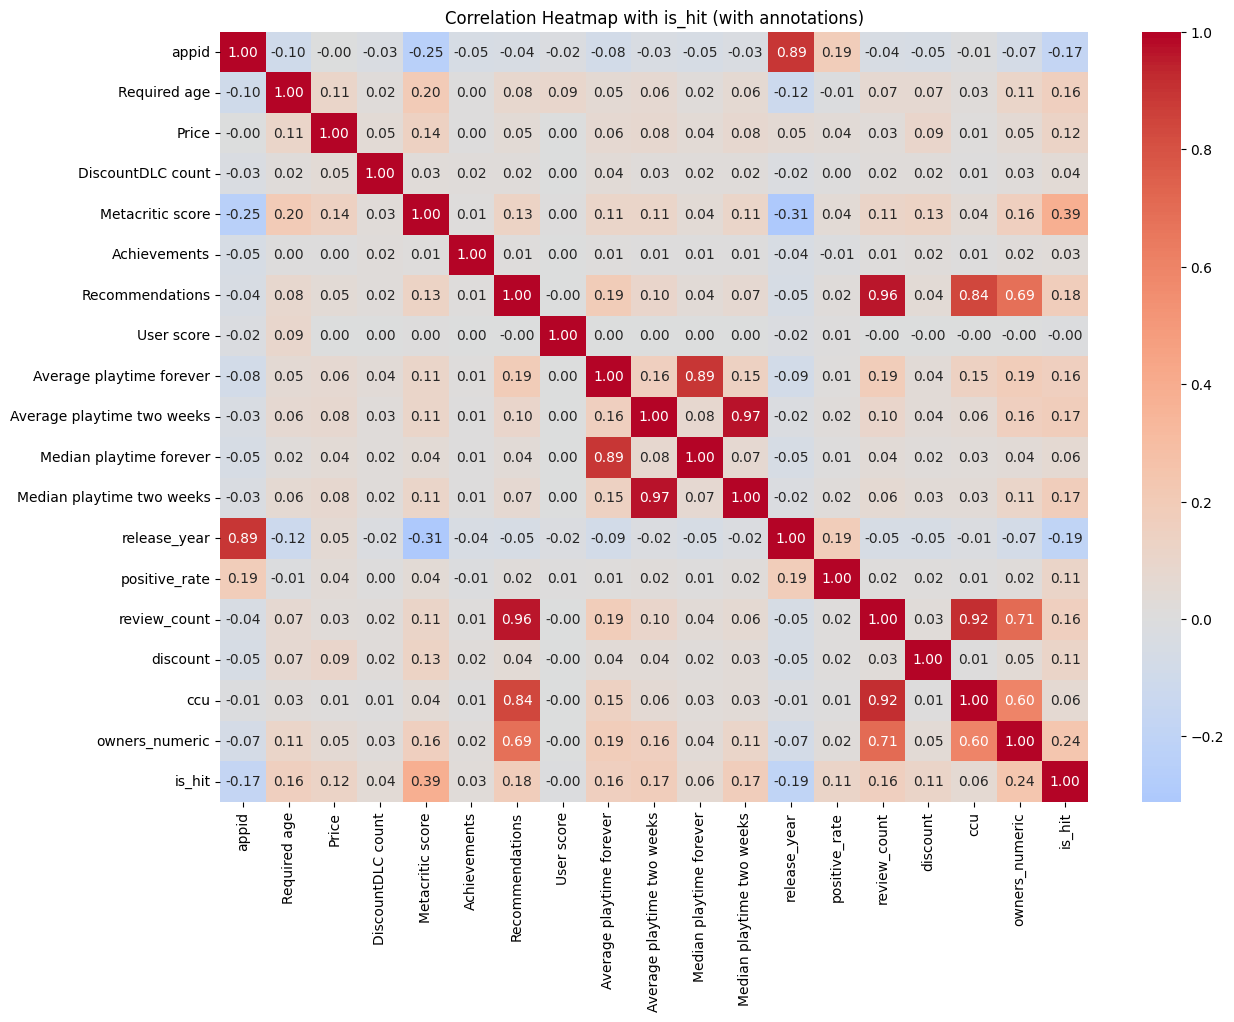

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 选取数值特征（包含 is_hit）
numeric_cols = merged_df_cleaned.select_dtypes(include=["int64", "float64"]).columns

# 计算相关矩阵
corr = merged_df_cleaned[numeric_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr,
    annot=True,     # 显示数字
    fmt=".2f",      # 数字格式保留 2 位小数
    cmap="coolwarm",
    center=0
)
plt.title("Correlation Heatmap with is_hit (with annotations)")
plt.show()

/var/folders/y7/v0nx8zrx04s74s7t7hm6z2fm0000gn/T/ipykernel_85466/3489291879.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


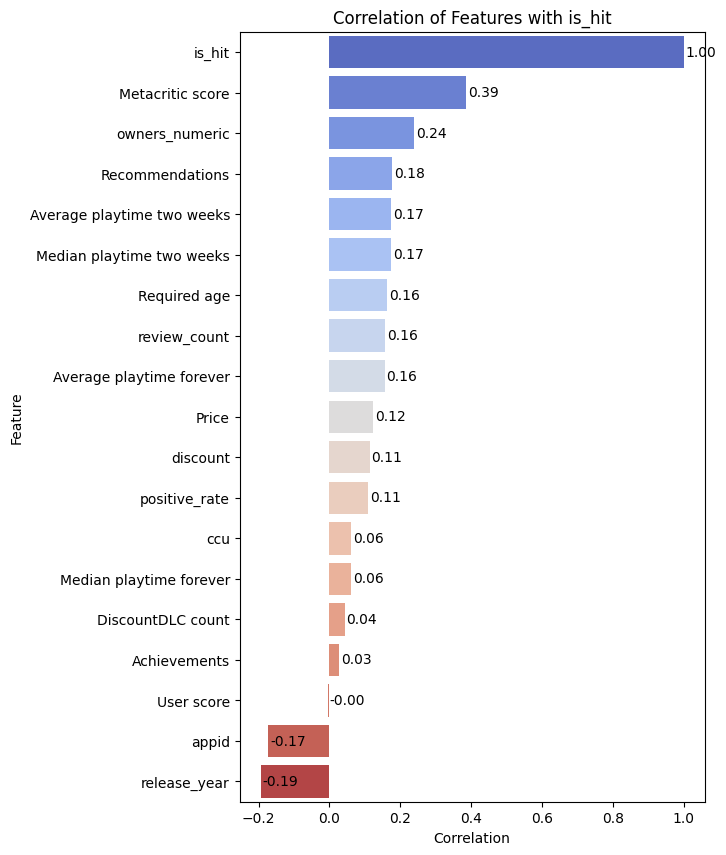

In [ ]:
corr_is_hit = corr["is_hit"].sort_values(ascending=False)

plt.figure(figsize=(6, 10))
ax = sns.barplot(
    x=corr_is_hit.values,
    y=corr_is_hit.index,
    palette="coolwarm"
)

plt.title("Correlation of Features with is_hit")
plt.xlabel("Correlation")
plt.ylabel("Feature")

# === 加数字 ===
for i, v in enumerate(corr_is_hit.values):
    ax.text(
        v + 0.005,      # 数字向右偏移一点
        i,              # 对应的 y 位置
        f"{v:.2f}",     # 显示两位小数
        va="center"
    )

plt.show()